In [4]:
cd ..

/home/rainorangelemon/Documents/lemp


In [5]:
from environment.dynamic.simple2arm_env import Simple2ArmEnv
from objects.dynamic_object import DynamicObject
from robot.abstract_robot import DynamicRobotFactory
from objects.trajectory import WaypointLinearTrajectory
from robot.simple2arm_robot import Simple2ArmRobot
from planner.sipp_planner import SippPlanner

import numpy as np
# visualize environment
%matplotlib inline
import matplotlib.pyplot as plt
from utils.utils import seed_everything

pybullet build time: May 20 2022 19:44:17
/home/rainorangelemon/anaconda3/envs/gnnmp/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
waypoints = np.linspace(0, np.pi/4, 20).tolist()
waypoints = [np.array([p,p]) for p in waypoints]
traj = WaypointLinearTrajectory(waypoints=waypoints)
robot = Simple2ArmRobot(base_position=(1, 1, 0), base_orientation=(0, 0, 0, 1))
objs = DynamicObject(item=robot, trajectory=traj)

env = Simple2ArmEnv(objects=[objs])
num_samples = 1000

loading dynamic object
Loading robot from ../data/robot/simple2arm/2dof.urdf
Robot loaded with item_id 0
Loading robot from ../data/robot/simple2arm/2dof.urdf
Robot loaded with item_id 1


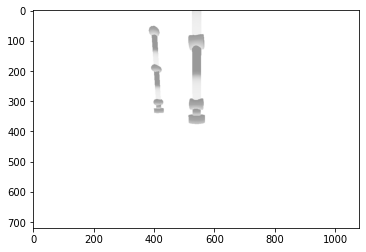

In [7]:
env.load()
plt.imshow(env.render())
plt.show()

In [8]:
start, goal = np.array([0.] * 2), np.array([np.pi*7/8, 0])
while True:
    seed_everything(42)
    initial_planner = SippPlanner(num_samples=num_samples, stop_when_success=True)
    result = initial_planner.plan(env, start, goal, timeout=('time', 1000))
    if result.solution:
        print('success')
        break
    else:
        # sample a non-trival problem setting and solve
        start, goal = env.robot.sample_random_init_goal()

success


In [6]:
result

{'solution': [array([0., 0.]),
  array([0.00647693, 0.05223153]),
  array([0.01295385, 0.10446306]),
  array([0.01943078, 0.15669458]),
  array([0.0259077 , 0.20892611]),
  array([0.03238463, 0.26115764]),
  array([0.03886156, 0.31338917]),
  array([0.04519555, 0.36446809]),
  array([0.05120066, 0.41675597]),
  array([0.05720577, 0.46904384]),
  array([0.06321087, 0.52133171]),
  array([0.06921598, 0.57361959]),
  array([0.07522109, 0.62590746]),
  array([0.08122619, 0.67819534]),
  array([0.0872313 , 0.73048321]),
  array([0.0932364 , 0.78277109]),
  array([0.09791504, 0.8235091 ]),
  array([0.10935528, 0.87488228]),
  array([0.12079551, 0.92625547]),
  array([0.13223574, 0.97762866]),
  array([0.14201369, 1.02153724]),
  array([0.13890662, 1.07407703]),
  array([0.13579955, 1.12661681]),
  array([0.13269249, 1.1791566 ]),
  array([0.12958542, 1.23169639]),
  array([0.12647836, 1.28423617]),
  array([0.12337129, 1.33677596]),
  array([0.12026422, 1.38931575]),
  array([0.11715716, 1.4

In [9]:
# Visualization
from time import sleep
def visualize_traj(env, traj_agent):
    max_len_traj = max([len(obj.trajectory.waypoints) for obj in env.objects])
                           
    max_time_obs = max_len_traj-1
    speed = 1 / max_time_obs
    gifs = []
    max_len = max(len(traj_agent.waypoints), max_len_traj)

    for timestep in np.linspace(0,  max_len-1, 100):
        env.robot.set_config(traj_agent.get_spec(timestep))
        for obj in env.objects:
            obj.set_config_at_time(timestep)
        p.performCollisionDetection()
        sleep(0.1)
        gifs.append(p.getCameraImage(width=360, height=360, lightDirection=[1, 1, 1], shadow=1,
                                                 renderer=p.ER_BULLET_HARDWARE_OPENGL)[2])
    return gifs

argv[0]=--background_color_red=1.0
argv[1]=--background_color_green=1.0
argv[2]=--background_color_blue=1.0
startThreads creating 1 threads.
starting thread 0
started thread 0 
argc=5
argv[0] = --unused
argv[1] = --background_color_red=1.0
argv[2] = --background_color_green=1.0
argv[3] = --background_color_blue=1.0
argv[4] = --start_demo_name=Physics Server
ExampleBrowserThreadFunc started
X11 functions dynamically loaded using dlopen/dlsym OK!
X11 functions dynamically loaded using dlopen/dlsym OK!
Creating context
Created GL 3.3 context
Direct GLX rendering context obtained
Making context current
GL_VENDOR=NVIDIA Corporation
GL_RENDERER=NVIDIA GeForce RTX 3080/PCIe/SSE2
GL_VERSION=3.3.0 NVIDIA 470.161.03
GL_SHADING_LANGUAGE_VERSION=3.30 NVIDIA via Cg compiler
pthread_getconcurrency()=0
Version = 3.3.0 NVIDIA 470.161.03
Vendor = NVIDIA Corporation
Renderer = NVIDIA GeForce RTX 3080/PCIe/SSE2
b3Printf: Selected demo: Physics Server
startThreads creating 1 threads.
starting thread 0
sta


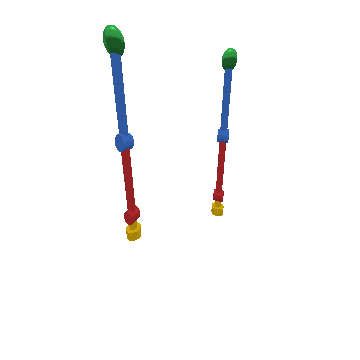

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import pybullet as p
import pybullet_data
import numpy as np
from utils.utils import save_gif
from IPython.display import HTML
import base64
from objects.trajectory import WaypointLinearTrajectory

env.load(GUI=True)

traj_agent = WaypointLinearTrajectory(result.solution)
gifs = visualize_traj(env, traj_agent)
save_gif(gifs, f'data/visualization/sipp.gif')
b64 = base64.b64encode(open(f'data/visualization/sipp.gif', 'rb').read()).decode('ascii')
display(HTML(f'<img src="data:image/gif;base64,{b64}" />'))